In [2]:
from sayamnn import one_hot_encoder,sigmoid,sigmoid_derivative,relu,relu_derivative, NeuralNetwork

In [30]:
import numpy as np
import scipy
import pandas as pd
import tqdm
import matplotlib.pyplot as plt

In [22]:
training_data = pd.read_csv('data/COL774_fmnist/fmnist_train.csv',header=None).to_numpy(dtype = 'float')
x_train, y_train = training_data[:, :-1]/255, training_data[:, -1]
y_train = one_hot_encoder(y_train.reshape((-1,1)))

test_data = pd.read_csv('data/COL774_fmnist/fmnist_test.csv',header  = None).to_numpy(dtype = 'float')
x_test, y_test = test_data[:, :-1]/255, test_data[:, -1]
y_test = one_hot_encoder(y_test.reshape((-1,1)))


In [20]:
nns = []
for n in [5,10,15,20,25]:
    nnb = NeuralNetwork(x_train,y_train,[n],sigmoid,sigmoid_derivative)
    nnb.train()
    nns.append(nnb)

In [23]:
n = [5,10,15,20,25]
train_scores = []
test_scores = []
for nn in nns:
    train_scores.append(nn.accuracy(x_train,y_train))
    test_scores.append(nn.accuracy(x_test,y_test))
    

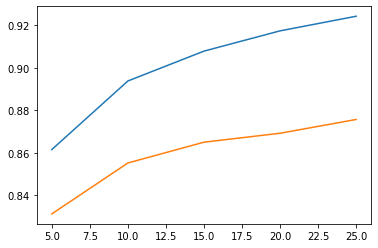

In [27]:
fig,ax = plt.subplots()
ax.plot(n,train_scores)
ax.plot(n,test_scores)
plt.show()

In [31]:
nns_adaptive = []
for i in tqdm.tqdm(n):
    nnc = NeuralNetwork(x_train,y_train,[i],sigmoid,sigmoid_derivative,adaptive=True)
    nnc.train()
    nns_adaptive.append(nnc)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [13:47<00:00, 165.52s/it]


In [42]:
train_scores = []
test_scores = []
for nn in nns_adaptive:
    train_scores.append(nn.accuracy(x_train,y_train))
    test_scores.append(nn.accuracy(x_test,y_test))

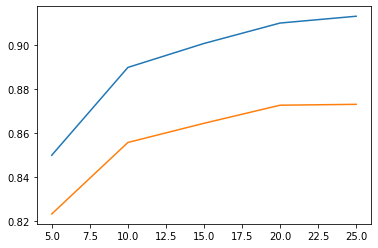

In [43]:
fig,ax = plt.subplots()
ax.plot(n,train_scores)
ax.plot(n,test_scores)
plt.show()

In [45]:
nnd_relu = NeuralNetwork(x_train,y_train,[100,100],relu,relu_derivative,adaptive=True)
nnd_relu.train()
nnd_sigmoid = NeuralNetwork(x_train,y_train,[100,100],sigmoid,sigmoid_derivative,adaptive=True)
nnd_sigmoid.train()

print(nnd_sigmoid.accuracy(x_train,y_train))
print(nnd_sigmoid.accuracy(x_test,y_test))
print(nnd_relu.accuracy(x_train,y_train))
print(nnd_relu.accuracy(x_test,y_test))

0.95155
0.8886
0.68525
0.6297
